Diabetes Dataset: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?resource=download

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

**Filtering the Dataset**


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/alexteboul/diabetes-health-indicators-dataset/versions/1


In [ ]:
diabetes_df = pd.read_csv(path + "/diabetes_012_health_indicators_BRFSS2015.csv")

In [ ]:
diabetes_df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [ ]:
no_diabetes = diabetes_df[diabetes_df["Diabetes_012"] == 0]
type1_diabetes = diabetes_df[diabetes_df["Diabetes_012"] == 1]
type2_diabetes = diabetes_df[diabetes_df["Diabetes_012"] == 2]

In [ ]:
min_size = len(type1_diabetes)
no_diabetes_downsampled = no_diabetes.sample(n=min_size, random_state=42)
type2_diabetes_downsampled = type2_diabetes.sample(n=min_size, random_state=42)

In [ ]:
balanced_diabetes_df = pd.concat([no_diabetes_downsampled, type1_diabetes, type2_diabetes_downsampled])

In [ ]:
X = balanced_diabetes_df.drop(columns=['Diabetes_012'])
y = balanced_diabetes_df['Diabetes_012']

In [ ]:
shuffled_df = balanced_diabetes_df.sample(frac=1, random_state=42).reset_index(drop=True)

split_point = int(0.8 * len(shuffled_df))

train_df = shuffled_df.iloc[:split_point]
test_df = shuffled_df.iloc[split_point:]

X_train = train_df.drop(columns=["Diabetes_012"])
y_train = train_df["Diabetes_012"]

X_test = test_df.drop(columns=["Diabetes_012"])
y_test = test_df["Diabetes_012"]

In [ ]:
def euclidean_distance(x1, x2):
  distance = np.sqrt(((x1 - x2) ** 2).sum(axis=1))
  return distance

In [ ]:
def predict_knn(X_train, y_train, X_test, k=9):
  predictions = []

  for i in range(len(X_test)):
    test_point = X_test.iloc[i]
    distances = euclidean_distance(X_train, test_point)
    k_indices = distances.nsmallest(k).index
    k_labels = y_train.loc[k_indices]
    predictions.append(k_labels.mode().iloc[0])

  return pd.Series(predictions, index=X_test.index)

In [ ]:
k=9

y_pred = predict_knn(X_train, y_train, X_test, k)

accuracy = (y_pred == y_test).mean()
print(f"Accuracy with k={k}: {accuracy:.2f}")

Accuracy with k=9: 0.47


<Axes: xlabel='Predicted', ylabel='Actual'>

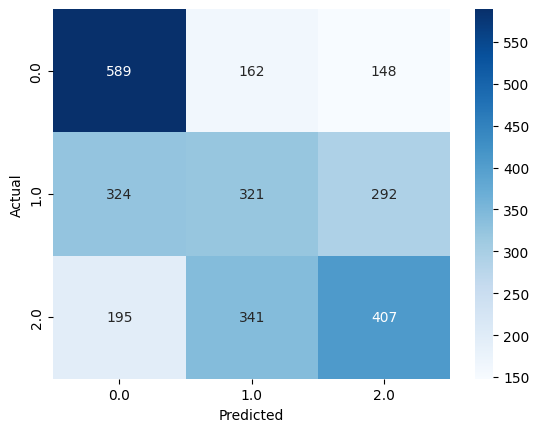

In [ ]:
conf_matrix = pd.crosstab(y_test, y_pred, rownames=["Actual"], colnames=["Predicted"])

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")

In [ ]:
shuffled_data = diabetes_df.sample(frac=1, random_state=42).reset_index(drop=True)

split_idx = int(0.8 * len(shuffled_data))

train_data = shuffled_data.iloc[:split_idx]
test_data = shuffled_data.iloc[split_idx:]

X_train_data = train_data.drop(columns=["Diabetes_012"])
y_train_data = train_data["Diabetes_012"]
X_test_data = test_data.drop(columns=["Diabetes_012"])
y_test_data = test_data["Diabetes_012"]

In [ ]:
X_train_data = (X_train_data - X_train_data.min()) / (X_train_data.max() - X_train_data.min())
X_test_data = (X_test_data - X_train_data.min()) / (X_train_data.max() - X_train_data.min())

In [ ]:
k_value = 5
y_pred_data = predict_knn(X_train_data, y_train_data, X_test_data, k=k_value)

accuracy_score = (y_pred_data == y_test_data).mean()
print(f"Accuracy with k={k_value}: {accuracy_score:.2f}")

Accuracy with k=5: 0.77


<Axes: xlabel='Predicted', ylabel='Actual'>

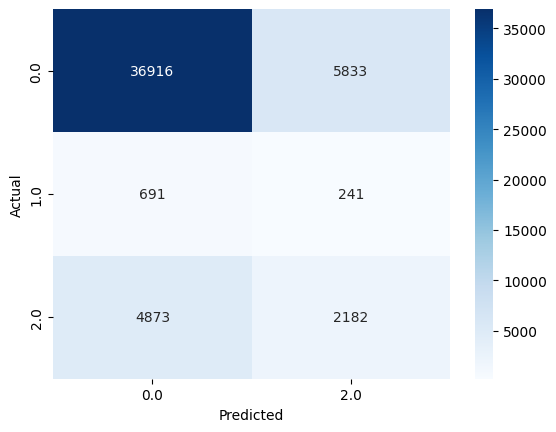

In [ ]:
conf_matrix_data = pd.crosstab(y_test_data, y_pred_data, rownames=["Actual"], colnames=["Predicted"])

sns.heatmap(conf_matrix_data, annot=True, fmt="d", cmap="Blues")